# RFM Model

## What is Recency, Frequency, Monetary Value (RFM)?

RFM Model helps understand who are top-tiered customers and who aren’t. The framework can help categorize data. 

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or organization's best cutomers by using certain measuers. Metrics are generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

**The RFM model is based on three quantitative factors:**

1. Recency: How recently a customer has made a purchase

2. Frequency: How often a customer makes a purchase.

3. Monetary: How much money a customer spends on purchases RFM analysis numberically.


### Agenda 
1. Calculate the RFM for each customer ID (Behavior segmentation by 3 important features)
2. Do the plotting and check three category
3. Create RFM Segmentation based on either quantile or designed by users
4. create the RFM Class and RFM Score
5. Assigned each user to particular market actions
6. Business recommendation for each customer

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
import seaborn as sns 

## Input Data

UCI machine learning 

Dataset reference: http://archive.ics.uci.edu/ml/datasets/Online+Retail+II

In [2]:
online_retail_df = pd.read_csv("online_retail_II.csv")

In [3]:
online_retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom


In [4]:
# 1. calculate the R F M for each customer Id (Behavior segmentation by 3 importatn features)
# 2. do the plotting and check each three category
# 3. creating RFM segmentation based on the criteria - can either designed by user / or based on the percentage 
#    calculate quantiles, and if higher than the quantiles the segment the user
# 4. concating the value together -> creating RFM segmentation

# Business analysis | Identify Upselling and cross selling opportunities

In [5]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'])

In [7]:
current_date = online_retail_df['InvoiceDate'].max() + timedelta(days=1)
online_retail_df['Customer ID'] = online_retail_df['Customer ID'].astype(str)

In [8]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  541910 non-null  object        
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
len(online_retail_df['Customer ID'].unique())

4373

In [10]:
# online_retail_df['InvoiceDate'] = online_retail_df['InvoiceDate'].apply(
#     lambda x: datetime.strftime(x, '%Y-%m-%d'))

In [11]:
# check the dataframe
print("Online Retail Data:")
print(f"{online_retail_df.shape[0]} rows; {online_retail_df.shape[1]} columns")
print(f"{online_retail_df['Customer ID'].isnull().sum()} transactions don\'t have a customer id")
print(f"Transactions timeframe from {online_retail_df['InvoiceDate'].min()} to {online_retail_df['InvoiceDate'].max()}")

Online Retail Data:
541910 rows; 8 columns
0 transactions don't have a customer id
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


## Calculate the values for Recency, Frequency, and Monetary

Behavioral Segmentation by 3 important features

In [12]:
# create the RFM table 

rfm_df = online_retail_df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'Customer ID': 'count',
    'Price': lambda x: x.sum()
})

rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'Customer ID': 'Frequency',
    'Price': 'Monetary'
}, inplace = True)

In [13]:
print("Validate the number of unique customer:", len(online_retail_df['Customer ID'].unique()))

rfm_df

Validate the number of unique customer: 4373


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,2,2.08
12347.0,2,182,481.21
12348.0,75,31,178.71
12349.0,19,73,605.10
12350.0,310,17,65.30
...,...,...,...
18281.0,181,7,39.36
18282.0,8,13,62.68
18283.0,4,756,1220.93


Great, we have 4373 customer records by recency of their purchase, the frequency by their quantity, and the monetary value of the purchases. Before segmenting the customer to the relative percentile based on the RFM Features, we would examine the distribution of our R, F, and M and remove the outliers if needed.

In [14]:
# f_df = rfm_df['Frequency'].plot.hist(bins=1500)
# f_df.set_xlim(0, 1000)

(0.0, 5000.0)

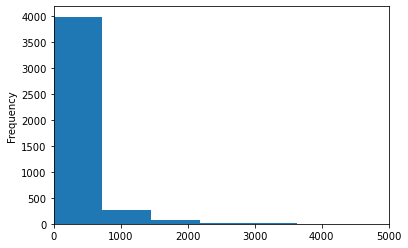

In [15]:
m_df = rfm_df['Monetary'].plot.hist(bins=1500)
m_df.set_xlim(0, 5000)

/Users/chenyenchun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chenyenchun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chenyenchun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

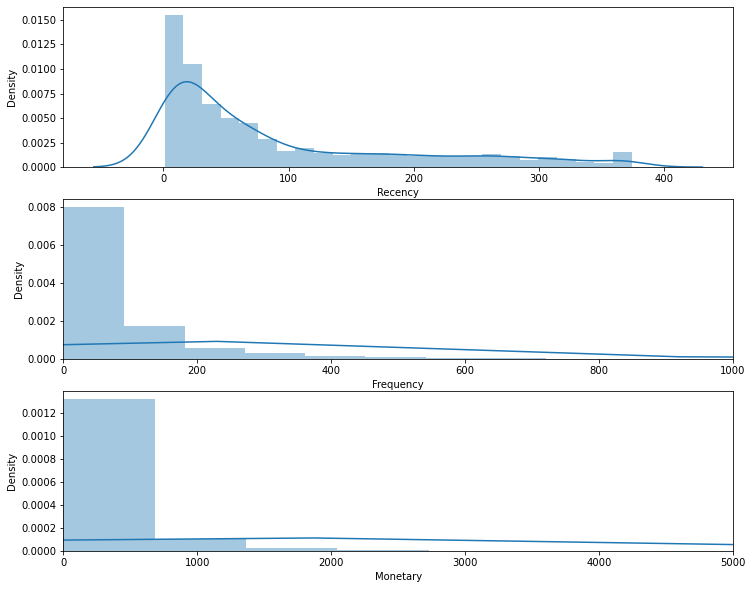

In [16]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
sns.distplot(rfm_df['Recency'])

plt.subplot(3, 1, 2)
ax1 = sns.distplot(rfm_df['Frequency'], bins=1500)
ax1.set_xlim(0, 1000)

plt.subplot(3, 1, 3)
ax2 = sns.distplot(rfm_df['Monetary'], bins= 1600)
ax2.set_xlim(0, 5000)

# sns.distplot(rfm_df['Monetary'])

# Show the plot
plt.show()

## Present the statistics

As some purchasing records were from the agents or colleagues in the company, they usually purchase more frequently and more expensively than our individual customers. Hence, I utilized the z-score to recognize outliers and remove them to ensure the resulting KPIs wouldn't be biased.

In [17]:
import scipy.stats
import statistics as stats
import numpy as np
import os

In [18]:
# number of 4 here reference to the std
new_rfm_df = rfm_df.copy()
new_rfm_df['Z_score'] = scipy.stats.zscore(new_rfm_df['Monetary'])
new_rfm_df = new_rfm_df.drop(new_rfm_df[new_rfm_df['Z_score'] > 4].index)

new_rfm_df['Z_score'] = scipy.stats.zscore(new_rfm_df['Frequency'])
new_rfm_df = new_rfm_df.drop(new_rfm_df[new_rfm_df['Z_score'] > 4].index)

In [19]:
# For checking
new_rfm_df[new_rfm_df['Z_score'] > 4]

,Recency,Frequency,Monetary,Z_score
Customer ID,,,,


In [20]:
table = new_rfm_df[['Recency', 'Frequency', 'Monetary']].agg([np.mean, np.median, max, min, np.std])
print('== RFM Statistics ==')
print()
print(table)

== RFM Statistics ==

           Recency    Frequency      Monetary
mean     92.468168    82.137899    283.258992
median   50.000000    41.000000    129.210000
max     374.000000  1011.000000  40278.900000
min       1.000000     1.000000      0.000000
std     100.824782   112.314498    920.293350


In [21]:
# for double checking
new_rfm_df.describe()

,Recency,Frequency,Monetary,Z_score
count,4351.000000,4351.000000,4351.000000,4351.000000
mean,92.468168,82.137899,283.258992,-0.046960
std,100.824782,112.314498,920.293350,0.483187
min,1.000000,1.000000,0.000000,-0.396023
25%,17.000000,17.000000,52.405000,-0.327189
50%,50.000000,41.000000,129.210000,-0.223939
75%,143.500000,100.000000,297.995000,0.029884
max,374.000000,1011.000000,40278.900000,3.949091


In [22]:
new_rfm_df = new_rfm_df.drop(columns=['Z_score'])

## RFM segmentation with class and score

1. Allow manager to type in the RFM criterias to classify customers (TODO: make it become a System)
2. cut the customer into different group

As I would like to classify customers into different groups, I would like to divide customers into 125 groups based on their Recency, Frequency, and Monetary scores. However, we can separate into 9 groups as well, based on the discussion with our business stakeholders.

In [23]:
r_labels = range(1, 6)
f_labels = range(5, 0, -1)
m_labels = range(5, 0, -1)

In [24]:
new_rfm_df['R'] = pd.qcut(new_rfm_df['Recency'], q=5, labels=r_labels)
new_rfm_df['F'] = pd.qcut(new_rfm_df['Frequency'], q=5, labels=r_labels)
new_rfm_df['M'] = pd.qcut(new_rfm_df['Monetary'], q=5, labels=r_labels)
# with these 3 scores in place, R F M, we can create our first RFM segment by concatenating the values
# together below 

In [25]:
new_rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346.0,326,2,2.08,5,1,1
12347.0,2,182,481.21,1,5,5
12348.0,75,31,178.71,4,3,3
12349.0,19,73,605.10,2,4,5
12350.0,310,17,65.30,5,2,2


In [26]:
new_rfm_df['RFM_Class'] = new_rfm_df['R'].astype(str) + new_rfm_df['F'].astype(str) + new_rfm_df['M'].astype(str)

In [27]:
new_rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Class
Customer ID,,,,,,,
12346.0,326,2,2.08,5,1,1,511
12347.0,2,182,481.21,1,5,5,155
12348.0,75,31,178.71,4,3,3,433
12349.0,19,73,605.10,2,4,5,245
12350.0,310,17,65.30,5,2,2,522


In [28]:
# how many groups we have 
len(new_rfm_df['RFM_Class'].value_counts())

100

In [29]:
new_rfm_df.groupby('RFM_Class')['RFM_Class'].nunique().sum()

100

In [30]:
# get the total number of each group
number_of_class_df = new_rfm_df.groupby('RFM_Class')['RFM_Class'].count().sort_values(ascending=False)


In [31]:
# get the RFM Score 
new_rfm_df['RFM_Score'] = new_rfm_df[['R', 'F', 'M']].sum(axis=1)
new_rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score
Customer ID,,,,,,,,
12346.0,326,2,2.08,5,1,1,511,7.0
12347.0,2,182,481.21,1,5,5,155,11.0
12348.0,75,31,178.71,4,3,3,433,10.0
12349.0,19,73,605.10,2,4,5,245,11.0
12350.0,310,17,65.30,5,2,2,522,9.0


In [32]:
new_rfm_df['RFM_Class'][0]

'511'

## Finalize the customers classifciation based on their RFM Score and Class

1. analyze each group 
2. segment each group

In [33]:
print("Show the Total Number for Top 10 customer class ")
number_of_class_df[:10]

Show the Total Number for Top 10 customer class 


RFM_Class
155    354
511    290
255    193
411    181
244    154
522    148
144    134
344    125
355    116
333    115
Name: RFM_Class, dtype: int64

In [34]:
# Classifying the customer into different group and find out who is the (VVIP and VIP) or disengaged user
# Can separate into VVIP 1 2 3 / VIP 1 2 3 group -> total for 6 group
# Example below show the disengaged user
print(f"VVIP(R=5 & F=5 & M=5): {len(new_rfm_df[new_rfm_df['RFM_Class'] == '555'])}")
print(f"VVIP(R=5 & F=4 & M=4): {len(new_rfm_df[new_rfm_df['RFM_Class'] == '544'])}")
print(f"VVIP(R=4 & F=4 & M=4): {len(new_rfm_df[new_rfm_df['RFM_Class'] == '444'])}")

VVIP(R=5 & F=5 & M=5): 17
VVIP(R=5 & F=4 & M=4): 34
VVIP(R=4 & F=4 & M=4): 91


In [35]:
def rfm_mapping(df):
    """
    https://blog.digitalj2.com/customer-based-segmentation-rfm-analysis
    """
    df['RFM_Segment'] = ""
    df['Marketing_Action'] = ""
    df['RFM_Class'] = df['RFM_Class'].astype(int)
    for i in range(len(df)):
        if df['RFM_Score'].iloc[i] >= 13 and ((df['M'].iloc[i] >= 4) and (df['R'].iloc[i] >= 4) and (df['F'].iloc[i] >= 4)):
            df['RFM_Segment'].iloc[i] = 'VVIP'
            df['Marketing_Action'].iloc[i] = 'Special Rewards, Loyality Programs, Exclusive offers'
        elif df['RFM_Score'].iloc[i] > 9 and ((df['M'].iloc[i] >= 3) and (df['R'].iloc[i] >= 3) and (df['F'].iloc[i] >= 3)):
            df['RFM_Segment'].iloc[i] = 'VIP'
            df['Marketing_Action'].iloc[i] = 'Rewards, Loyality Programs, Exclusive offers'
        elif (df['RFM_Score'].iloc[i] > 9) and ((df['M'].iloc[i] >= 4) and (df['R'].iloc[i] >= 4) and (df['F'].iloc[i] <= 2)):
            df['RFM_Segment'].iloc[i] ='New Big Spenders'
            df['Marketing_Action'].iloc[i] = 'Personalized Email, Upsell expensive item, Enroll Loyality Program'
        elif (df['RFM_Score'].iloc[i] >= 9) and ((df['M'].iloc[i] <= 3) and (df['R'].iloc[i] >= 4) and (df['F'].iloc[i] >= 4)):
            df['RFM_Segment'].iloc[i] ='Lower spending but Loyal Customer'
            df['Marketing_Action'].iloc[i] = 'Bundles, Cross sell, Free Shipping'
        elif df['RFM_Score'].iloc[i] >= 6 or df['RFM_Class'].iloc[i] >= 222:
            df['RFM_Segment'].iloc[i] = 'Potential Loyalists'
            df['Marketing_Action'].iloc[i] = 'Cross Sell Recommendations, Discount and coupons'
        elif (df['R'].iloc[i] <= 3) or (df['RFM_Class'].iloc[i] >= 111):
            df['RFM_Segment'].iloc[i] ='Disengaged Customers'
            df['Marketing_Action'].iloc[i] = 'Re-engagement Campaign'
        else:
            df['RFM_Segment'].iloc[i] ='Lost Customers'

In [36]:
rfm_mapping(new_rfm_df)


/Users/chenyenchun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
new_rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score,RFM_Segment,Marketing_Action
Customer ID,,,,,,,,,,
12346.0,326,2,2.08,5,1,1,511,7.0,Potential Loyalists,"Cross Sell Recommendations, Discount and coupons"
12347.0,2,182,481.21,1,5,5,155,11.0,Potential Loyalists,"Cross Sell Recommendations, Discount and coupons"
12348.0,75,31,178.71,4,3,3,433,10.0,VIP,"Rewards, Loyality Programs, Exclusive offers"
12349.0,19,73,605.10,2,4,5,245,11.0,Potential Loyalists,"Cross Sell Recommendations, Discount and coupons"
12350.0,310,17,65.30,5,2,2,522,9.0,Potential Loyalists,"Cross Sell Recommendations, Discount and coupons"


In [38]:
new_rfm_df['RFM_Segment'].value_counts()

Potential Loyalists                  3156
VIP                                   779
Disengaged Customers                  242
VVIP                                  147
New Big Spenders                       26
Lower spending but Loyal Customer       1
Name: RFM_Segment, dtype: int64

In [39]:
new_rfm_df[new_rfm_df['RFM_Segment'] == 'Disengaged Customers'].head()

,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score,RFM_Segment,Marketing_Action
Customer ID,,,,,,,,,,
12367.0,4,11,35.20,1,1,1,111,3.0,Disengaged Customers,Re-engagement Campaign
12442.0,3,12,40.08,1,1,1,111,3.0,Disengaged Customers,Re-engagement Campaign
12445.0,22,4,31.95,2,1,1,211,4.0,Disengaged Customers,Re-engagement Campaign
12558.0,2,22,27.50,1,2,1,121,4.0,Disengaged Customers,Re-engagement Campaign
12586.0,17,12,54.60,2,1,2,212,5.0,Disengaged Customers,Re-engagement Campaign


### Market Actions

1. VVIP
    - Call or Survey to understand why they buy and stay loyal. Use this information to better serve them and profile this group to target new ones
    - Surprise them with gifts in some of their orders
    - reward them from loyalty
2. VIP
    - Call or Survey to understand why they buy and stay loyal. Use this information to better serve them and profile this group to target new ones
    - Provide exclusive offers
    - reward them from loyalty
3. Big Spenders
    - Welcome them and make them feel special
    - personalized welcome email with a coupon code to incentivize a repeat purchase
    - enroll these customers into a loyalty program that rewards order frequency
4. Lower Spending But a loyal customer
    - Create bundles that incentivize in context with prior purchases
    - provide cross-sell and upsell offers in context with prior purchases
    - Free shipping
5. Potential customers
    - cross-sell recommendations
    - Coupon and discount
6. Disengaged customers
    - Re-engagement campaigns to win these customers back

## Group customer by their customer segmentation

In [40]:
rfm_level_agg = new_rfm_df.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
    'Marketing_Action': 'unique'
}).round(2)

print(rfm_level_agg)

                                  Recency Frequency Monetary        \
                                     mean      mean     mean count   
RFM_Segment                                                          
Disengaged Customers                14.86     12.14    32.09   242   
Lower spending but Loyal Customer   92.00     98.00    92.66     1   
New Big Spenders                   191.81     13.88  2228.96    26   
Potential Loyalists                 90.28     82.62   259.54  3156   
VIP                                107.89     92.81   347.55   779   
VVIP                               167.84    142.42   522.34   147   

                                                                    Marketing_Action  
                                                                              unique  
RFM_Segment                                                                           
Disengaged Customers                                        [Re-engagement Campaign]  
Lower spending but Lo

In [41]:
new_rfm_level_agg = rfm_level_agg.reset_index()

In [42]:
new_rfm_level_agg

RFM_Segment Recency Frequency Monetary        \
                                        mean      mean     mean count   
0               Disengaged Customers   14.86     12.14    32.09   242   
1  Lower spending but Loyal Customer   92.00     98.00    92.66     1   
2                   New Big Spenders  191.81     13.88  2228.96    26   
3                Potential Loyalists   90.28     82.62   259.54  3156   
4                                VIP  107.89     92.81   347.55   779   
5                               VVIP  167.84    142.42   522.34   147   

                                    Marketing_Action  
                                              unique  
0                           [Re-engagement Campaign]  
1               [Bundles, Cross sell, Free Shipping]  
2  [Personalized Email, Upsell expensive item, En...  
3  [Cross Sell Recommendations, Discount and coup...  
4     [Rewards, Loyality Programs, Exclusive offers]  
5  [Special Rewards, Loyality Programs, Exclusive...

Note: 
Export to the csv file. Plus, we can desing a system and help company automatically calculated customer's values and conduct customer segmentation if needed. 

In [43]:
# K-Mean clustering ..